<a href="https://colab.research.google.com/github/bryandaetz1/House_Prices_Regression/blob/master/Bryan_Daetz_cs68_zesstimate_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from vega_datasets import data
import seaborn as sns

#to split data into train and test sets
from sklearn.model_selection import train_test_split

#to evaluate model
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

#for histogram and normal probability plot
from scipy.stats import norm   
from scipy import stats

In [ ]:
housing_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/housing.csv')

In [ ]:
# Data description available here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
housing_data.shape

(1460, 81)

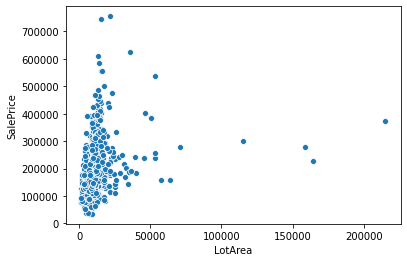

In [ ]:
sns.scatterplot(y='SalePrice', x='LotArea', data=housing_data)

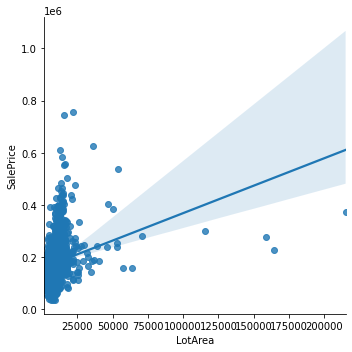

In [ ]:
sns.lmplot(y='SalePrice', x='LotArea', data=housing_data)

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#identifying correlation between independent variables and target variable
housing_data.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

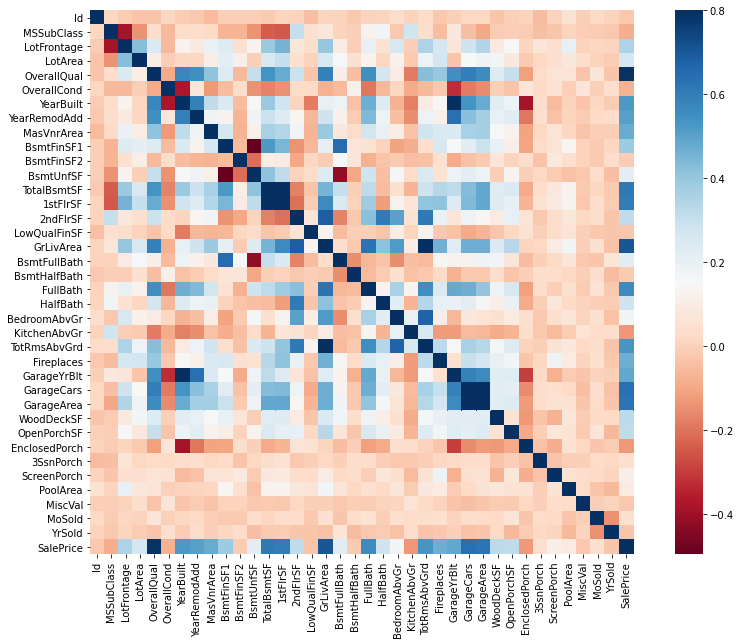

In [ ]:
# visualizing this correlation
corr_map = housing_data.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_map, square = True, vmax = 0.8, cmap = 'RdBu')

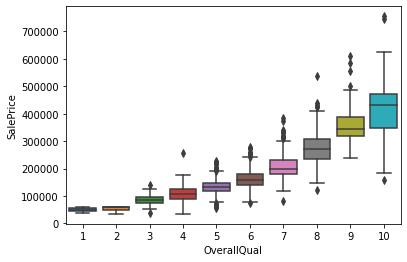

In [ ]:
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housing_data)

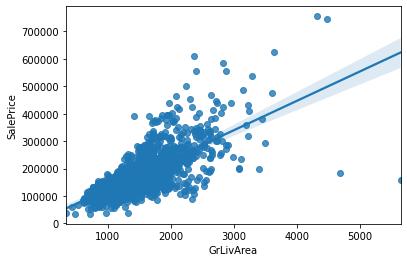

In [ ]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = housing_data)

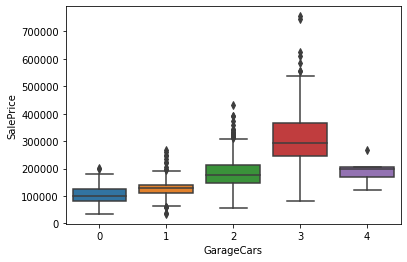

In [ ]:
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = housing_data)

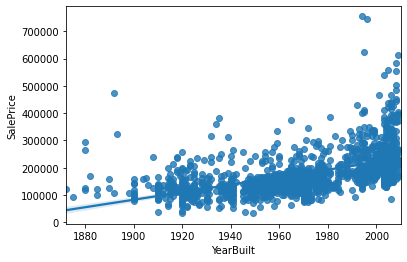

In [ ]:
sns.regplot(x = 'YearBuilt', y = 'SalePrice', data = housing_data)

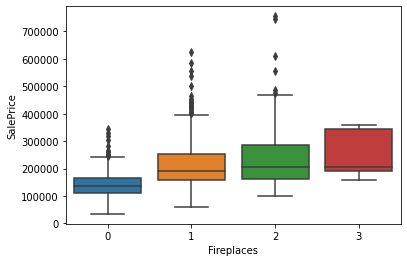

In [ ]:
sns.boxplot(x = 'Fireplaces', y = 'SalePrice', data = housing_data)

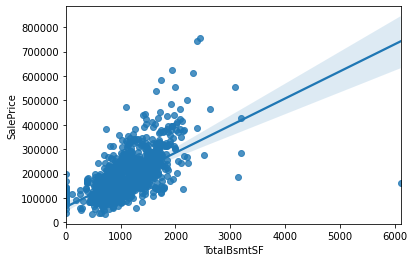

In [ ]:
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', data = housing_data)

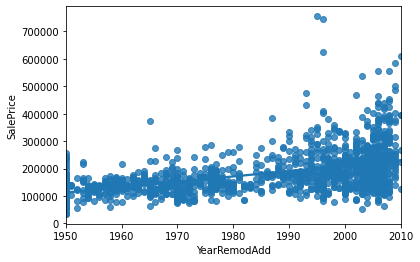

In [ ]:
sns.regplot(x = 'YearRemodAdd', y = 'SalePrice', data = housing_data)

In [ ]:
#testing to see if a feature that shows whether a remodel occurred is more impactful that just the year it was added
housing_data['Remodel'] = pd.Series(len(housing_data['YearRemodAdd']), index = housing_data.index)
housing_data['Remodel'] = 0   #0 will represent not having a remodel
housing_data.loc[housing_data['YearRemodAdd'] > housing_data['YearBuilt'], 'Remodel'] = 1

#testing to see if this worked as expected
housing_data[['Remodel','YearRemodAdd','YearBuilt']].head(10)

,Remodel,YearRemodAdd,YearBuilt
0,0,2003,2003
1,0,1976,1976
2,1,2002,2001
3,1,1970,1915
4,0,2000,2000
5,1,1995,1993
6,1,2005,2004
7,0,1973,1973
8,1,1950,1931
9,1,1950,1939


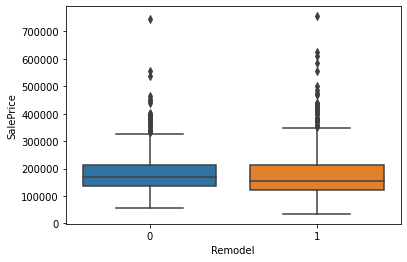

In [ ]:
sns.boxplot(x = 'Remodel', y = 'SalePrice', data = housing_data)

#does not appear to be a meaningful correlation between whether a house has been remodeled and its sales price

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

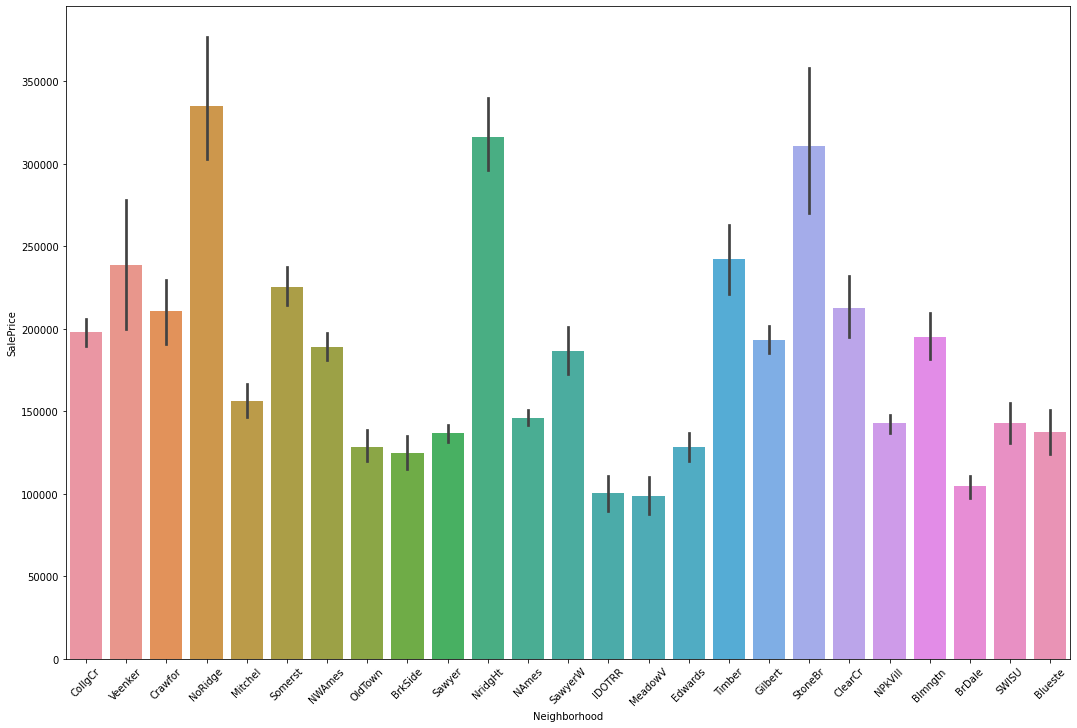

In [ ]:
f, ax = plt.subplots(figsize=(18,12)) #setting figure size
plt.xticks(rotation = 45) # rotating x axis labels for readability

sns.barplot(x = 'Neighborhood', y = 'SalePrice', data = housing_data)
housing_data['Neighborhood'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

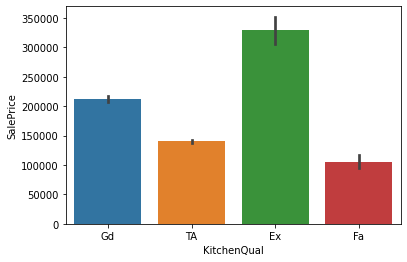

In [ ]:
sns.barplot(x = 'KitchenQual', y = 'SalePrice', data = housing_data)
housing_data['KitchenQual'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

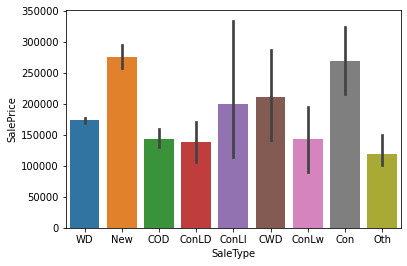

In [ ]:
# tested 'Heating', 'Functional' and 'HouseType' variables, didn't appear to be a meaningful correlation

sns.barplot(x = 'SaleType', y = 'SalePrice', data = housing_data)
housing_data['SaleType'].value_counts()


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

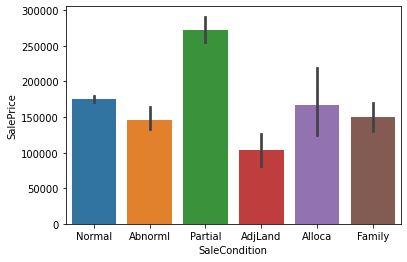

In [ ]:
#potential correlation (houses with 'Partial' sale condition appear to sell for more), but this condition only applies to roughly 8% of the dataset

sns.barplot(x = 'SaleCondition', y = 'SalePrice', data = housing_data)
housing_data['SaleCondition'].value_counts()

In [ ]:
neighborhoods = pd.get_dummies(housing_data['Neighborhood'])
neighborhoods.head()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
kitchen_qual = pd.get_dummies(housing_data['KitchenQual'])
kitchen_qual.head()

,Ex,Fa,Gd,TA
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
sale_types = pd.get_dummies(housing_data['SaleType'])
sale_types.head()

,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


SalePrice    1.000000
TA           0.519298
Ex           0.504094
NridgHt      0.402149
New          0.357509
NoRidge      0.330424
Gd           0.321641
WD           0.242598
StoneBr      0.215363
OldTown      0.192189
NAmes        0.188513
Edwards      0.179949
IDOTRR       0.164056
Fa           0.157199
BrkSide      0.143648
Somerst      0.140058
Sawyer       0.128394
Timber       0.126236
MeadowV      0.112544
BrDale       0.101303
COD          0.081047
CollgCr      0.072626
Crawfor      0.071160
SWISU        0.063705
Veenker      0.063471
Mitchel      0.057845
ClearCr      0.055718
ConLD        0.041791
Con          0.041357
NPkVill      0.037910
Gilbert      0.035940
Oth          0.034895
ConLw        0.027475
NWAmes       0.023483
Blueste      0.020250
CWD          0.019588
Blmngtn      0.019066
SawyerW      0.014560
ConLI        0.014371
Name: SalePrice, dtype: float64


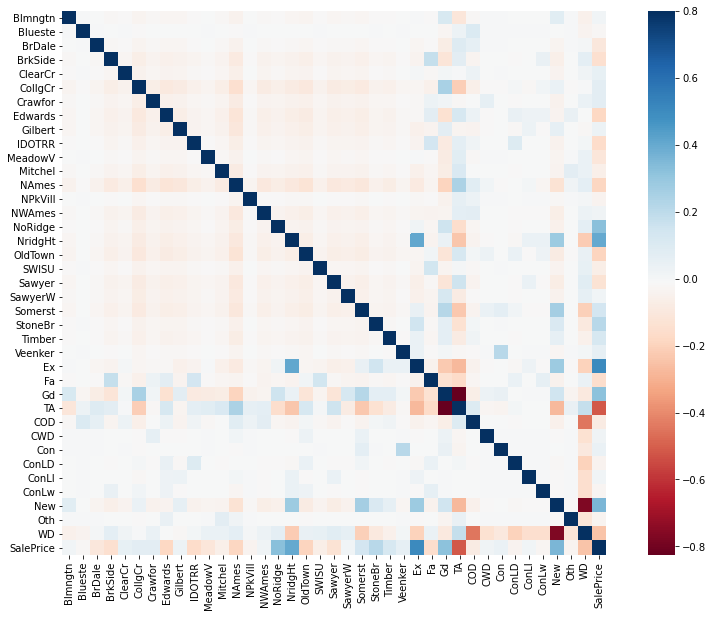

In [ ]:
corr_test = pd.concat([neighborhoods, kitchen_qual, sale_types, housing_data['SalePrice']], axis = 1, sort = False)
print(abs(corr_test.corr()['SalePrice']).sort_values(ascending = False))

# creating heat map for dummie variables
corr_test_map = corr_test.corr()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corr_test_map, square = True, vmax = 0.8, cmap = 'RdBu')

In [ ]:
#chose dummie variables primarily based on pearson correlation coefficients, making sure to only select a max of n-1 dummie variables for each categorical variable
# made some adjustments after testing model to remove variables with p value > 0.05

dummies = ['TA','Ex','Gd','NridgHt','New','NoRidge','IDOTRR','OldTown','Edwards','WD','StoneBr','MeadowV','BrDale']

#adding dummie variables to dataframe
housing_data = pd.concat([housing_data, neighborhoods, kitchen_qual, sale_types], axis = 1, sort = False)

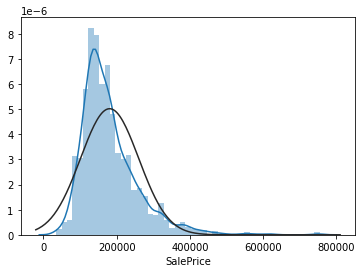

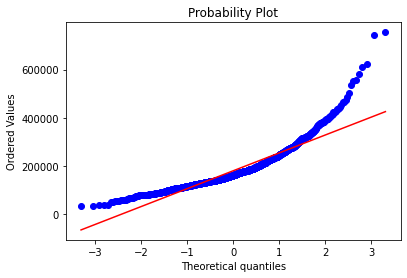

In [ ]:
#histogram and normal probability plot for SalePrice
sns.distplot(housing_data['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(housing_data['SalePrice'], plot=plt)

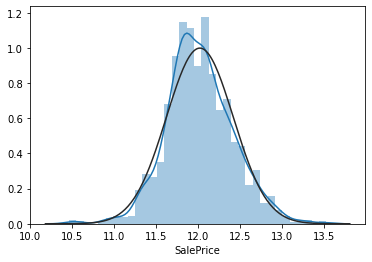

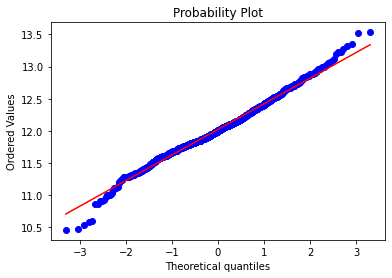

In [ ]:
#taking log of SalePrice may address positive skewness, testing to see if this helps
housing_data['SalePrice'] = np.log(housing_data['SalePrice'])
sns.distplot(housing_data['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(housing_data['SalePrice'], plot = plt)

In [ ]:
# using log of SalePrice as target variable for model
y = housing_data['SalePrice']
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
# checking for missing values
y.isnull().sum()

0

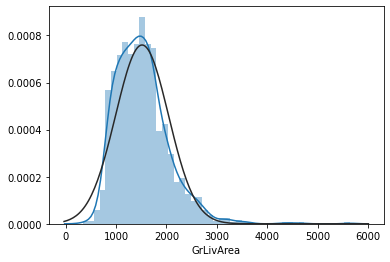

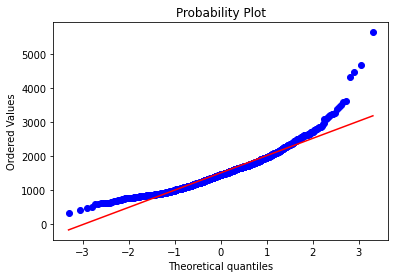

In [ ]:
#histogram and normal probablity plot for GrLivArea
sns.distplot(housing_data['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(housing_data['GrLivArea'], plot = plt)

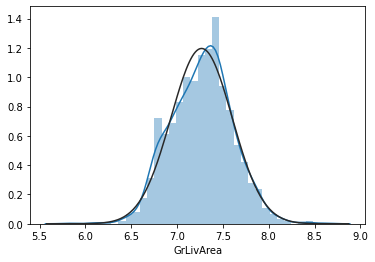

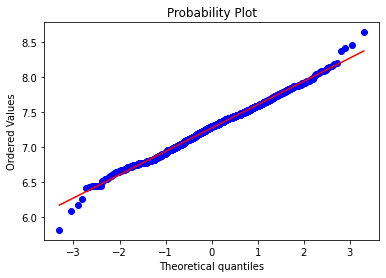

In [ ]:
# skewness is also present in the distribution of GrLivArea, testing to see impact of taking log
housing_data['GrLivArea'] = np.log(housing_data['GrLivArea'])
sns.distplot(housing_data['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(housing_data['GrLivArea'], plot = plt)

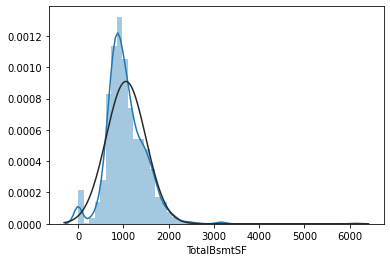

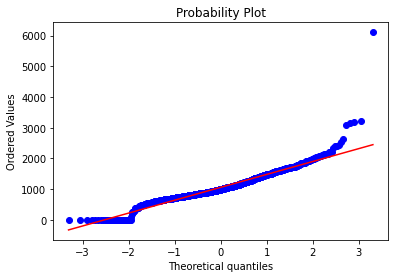

In [ ]:
#histogram and normal probability plot for TotalBsmtSF
sns.distplot(housing_data['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(housing_data['TotalBsmtSF'], plot = plt)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


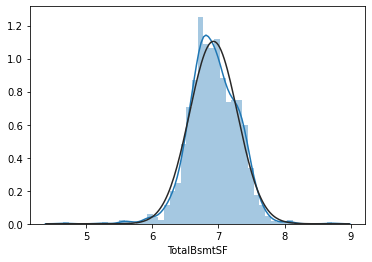

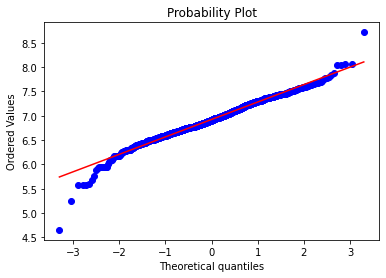

In [ ]:
#skewness is present here as well, however because there are 0 values and log(0) is undefined I'll need to only take the log of non-zero values
housing_data.loc[housing_data['TotalBsmtSF'] > 0, 'TotalBsmtSF'] = np.log(housing_data['TotalBsmtSF'])

#histogram and normal probability plot for transformed variable
sns.distplot(housing_data[housing_data['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(housing_data[housing_data['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot = plt)

In [ ]:
# chose independent variables initially based on correlation coefficients
# chose to omit multiple instances of variables related to area, as 'GrLivArea' seemed to be the best predictor 
# made adjustments after testing model to remove variables with p value > 0.05

X = pd.concat([housing_data[['OverallQual','GrLivArea','GarageCars','YearBuilt', 'Fireplaces', 'TotalBsmtSF']], housing_data[dummies]], axis = 1, sort = False)

X.head()


,OverallQual,GrLivArea,GarageCars,YearBuilt,Fireplaces,TotalBsmtSF,TA,Ex,Gd,NridgHt,New,NoRidge,IDOTRR,OldTown,Edwards,WD,StoneBr,MeadowV,BrDale
0,7,7.444249,2,2003,0,6.752270,0,0,1,0,0,0,0,0,0,1,0,0,0
1,6,7.140453,2,1976,1,7.140453,1,0,0,0,0,0,0,0,0,1,0,0,0
2,7,7.487734,2,2001,1,6.824374,0,0,1,0,0,0,0,0,0,1,0,0,0
3,7,7.448334,3,1915,1,6.628041,0,0,1,0,0,0,0,0,0,1,0,0,0
4,8,7.695303,3,2000,1,7.043160,0,0,1,0,0,1,0,0,0,1,0,0,0


In [ ]:
# confirming whether there are missing values
X.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
YearBuilt      0
Fireplaces     0
TotalBsmtSF    0
TA             0
Ex             0
Gd             0
NridgHt        0
New            0
NoRidge        0
IDOTRR         0
OldTown        0
Edwards        0
WD             0
StoneBr        0
MeadowV        0
BrDale         0
dtype: int64

In [ ]:
X = sm.add_constant(X)
X.head()

,const,OverallQual,GrLivArea,GarageCars,YearBuilt,Fireplaces,TotalBsmtSF,TA,Ex,Gd,NridgHt,New,NoRidge,IDOTRR,OldTown,Edwards,WD,StoneBr,MeadowV,BrDale
0,1.0,7,7.444249,2,2003,0,6.752270,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1.0,6,7.140453,2,1976,1,7.140453,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1.0,7,7.487734,2,2001,1,6.824374,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1.0,7,7.448334,3,1915,1,6.628041,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1.0,8,7.695303,3,2000,1,7.043160,0,0,1,0,0,1,0,0,0,1,0,0,0


In [ ]:
# splitting data into train and test sets, chose 85/15 split as this isn't the largest dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [ ]:
#model = sm.OLS(y, X)
#results = model.fit()
#print(results.summary())

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     371.8
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:25:24   Log-Likelihood:                 588.56
No. Observations:                1241   AIC:                            -1137.
Df Residuals:                    1221   BIC:                            -1035.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.3708      0.490     10.964      

In [ ]:
# generating predictions on test set
predictions = results.predict(X_test)

#converting actual values and predicted values back to prices in dollars (inverse log)
y_test = np.exp(y_test)
predictions = np.exp(predictions)

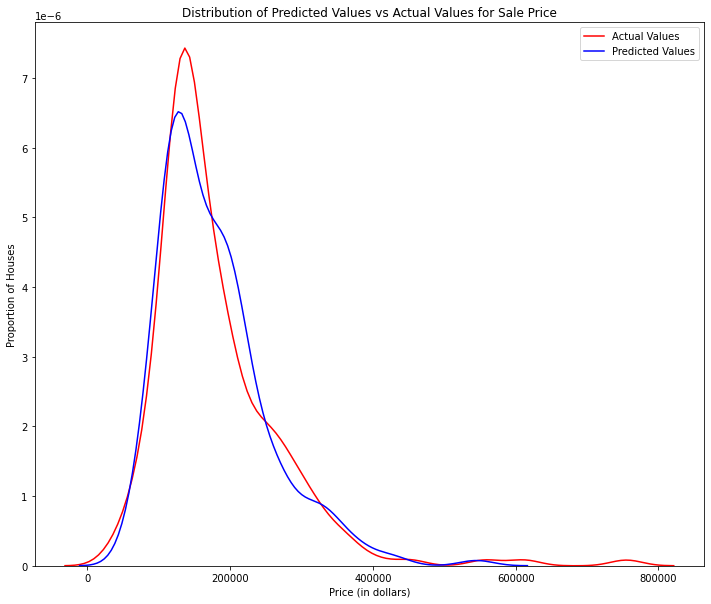

In [ ]:
# visualizing distribution of predicted values vs actual values for SalePrice
plt.figure(figsize = (12,10))

ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Values')
ax2 = sns.distplot(predictions, hist = False, color = 'b', label = 'Predicted Values')

plt.title('Distribution of Predicted Values vs Actual Values for Sale Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')

plt.show()
plt.close()


In [ ]:
#calculating root mean squared error 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))

#calulating R**2 score
print('R**2 Score:', r2_score(y_test, predictions))

Root Mean Squared Error: 32025.855751145926
R**2 Score: 0.8736654551345058
